In [127]:
%matplotlib inline     
# ^Sans animations
# %matplotlib notebook 
# ^Avec animations
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

 **Remplissage d'une bibliothèque**
 

Nous allons modeliser l'évolution de l'affluence dans la bibliothèque des Licences au cours du temps.

Nous disposons des horaires et du nombre de place de la bibliothèque 

In [235]:
# aff : le taux d'affluence actuelle
# afflim : le taux d'affluence à partir duquel la personne hésite
# p1 : la probabilité que la personne ne rentre pas dans la bibliothèque

def alea_entree(aff,afflim,p1):
    '''
    float->int
    en fonction du taux d'affluence et d'une probabilité,retourne 1 si l'élève rentre, sinon 0.
    '''
    if aff>=afflim :
        u = np.random.random()
        if u < p1: 
            return 0
    return 1

In [273]:
# p2 : la probabilité que la personne ne sort pas dans la bibliothèque
p2 =.95
def alea_sortie(aff,afflim,p2):
    '''
    float->int
    en fonction du taux d'affluence et d'une probabilité,retourne 1 si l'élève sort, sinon 0.
    '''
    if aff>=afflim :
        u = np.random.random()
        if u < p2: 
            return 0
        else:
            return 1
    return 0

In [237]:
def bibliothèque(bt0,btmax,afflim,p1,p2,n):
    ''' hyp : bt0 <= bt'''
    bt=bt0
    aff=bt/btmax
    L=[bt0]
    for i in range(n):
        emax = btmax-bt
        a = alea_entree(aff,afflim,p1,emax)
        b = alea_sortie(aff,afflim,p2)
        if bt < btmax:
            bt += a
        if bt>0:
            bt-=b
        L.append(bt)
        aff=bt/btmax
    return L
        
        
        
        

affichons la courbe

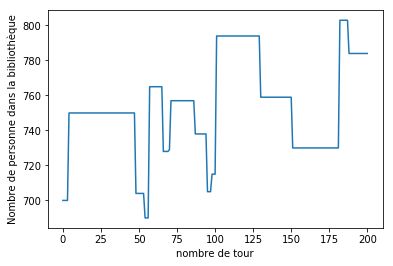

In [279]:
def plotb0(L):
    plt.figure()
    plt.plot(L)
    plt.ylabel("Nombre de personne dans la bibliothèque")
    plt.xlabel("nombre de tour")
    plt.show()
    return
plotb0(bibliothèque(700,745,.8,.9,.95,200))

Ici nous etudions l'evolution du remplissage de la bibliothèque en fonction du temps 

In [239]:
def est_ouvert(h):
    '''int-> bool
    indique si la bibliotheque est ouverte ou fermée en fonction de l'heure actuel h et des horraires '''
    return 22>h>=9
    

In [216]:
print(est_ouvert(11))

True


Nous modelisons la fonction suivante en tenant compte du paramètre horaire 

In [240]:
def bibliothèquetemp(bt0,btmax,afflim,p1,p2):
    ''' hyp : bt0 <= bt'''
    bt=bt0
    aff=bt/btmax
    L=[bt0]
    for t in range(24):
        if est_ouvert(t):
            a = alea_entree(aff,afflim,p1)
            b = alea_sortie(aff,afflim,p2)
            if bt < btmax:
                bt += a
            if bt>0:
                bt-=b
        else:
            bt=0
        L.append(bt)
        aff=bt/btmax
    return L


affichons la courbe

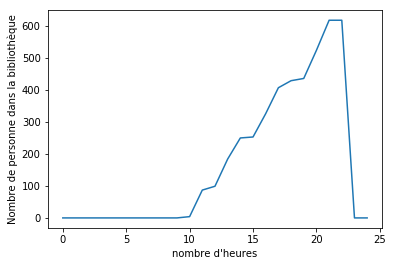

In [278]:
def plotb1(L):
    plt.figure()
    plt.plot(L)
    plt.ylabel("Nombre de personne dans la bibliothèque")
    plt.xlabel("nombre d'heures")
    plt.show()
    return
plotb1(bibliothèquetemp(0,745,.8,.9,.95))

#t0,btmax,afflim,p1,p2,n
nous voyons que plus la probabilité de ne pas entrer p1 est grande plu


In [280]:
np.random.randint(0,50)

4